In [2]:
import numpy as np
import os
import re
from collections import Counter


def single_matrix_from_string(matstringlist) -> np.array:
    fullmatrix = []
    for line in matstringlist:
        fullmatrix += [[float(x) for x in line.split()]]
    print(np.array(fullmatrix).shape)
    assert np.array(fullmatrix).shape == (4, 26)
    return np.array(fullmatrix)

def extract_hodge_number_from_string(metastring) -> int:
    hodge_search = re.search('H:(.*),', metastring)
    if hodge_search:
        hodgestring = hodge_search.group(1)
        return int(hodgestring)

def parse_txt_file():
    X = []
    y = []
    with open('v26') as file:
        counter = 0
        reading_buffer = []
        for line in file:
            counter += 1
            reading_buffer += [line.rstrip()]
            if counter % 5 == 0:
                print(counter)
                #print(reading_buffer)
                try:
                    new_y = extract_hodge_number_from_string(reading_buffer[0])
                    new_X = single_matrix_from_string(reading_buffer[1:5])
                except AssertionError as e:
                    break
                y += [new_y]
                X += [new_X]
                reading_buffer = []
    print(Counter(y))
    return np.array(X), np.array(y)


In [3]:
X, y = parse_txt_file()
#print(np.array(X).shape)
#print(np.array(y).shape)

流式输出内容被截断，只能显示最后 5000 行内容。
(4, 26)
336370
(4, 26)
336375
(4, 26)
336380
(4, 26)
336385
(4, 26)
336390
(4, 26)
336395
(4, 26)
336400
(4, 26)
336405
(4, 26)
336410
(4, 26)
336415
(4, 26)
336420
(4, 26)
336425
(4, 26)
336430
(4, 26)
336435
(4, 26)
336440
(4, 26)
336445
(4, 26)
336450
(4, 26)
336455
(4, 26)
336460
(4, 26)
336465
(4, 26)
336470
(4, 26)
336475
(4, 26)
336480
(4, 26)
336485
(4, 26)
336490
(4, 26)
336495
(4, 26)
336500
(4, 26)
336505
(4, 26)
336510
(4, 26)
336515
(4, 26)
336520
(4, 26)
336525
(4, 26)
336530
(4, 26)
336535
(4, 26)
336540
(4, 26)
336545
(4, 26)
336550
(4, 26)
336555
(4, 26)
336560
(4, 26)
336565
(4, 26)
336570
(4, 26)
336575
(4, 26)
336580
(4, 26)
336585
(4, 26)
336590
(4, 26)
336595
(4, 26)
336600
(4, 26)
336605
(4, 26)
336610
(4, 26)
336615
(4, 26)
336620
(4, 26)
336625
(4, 26)
336630
(4, 26)
336635
(4, 26)
336640
(4, 26)
336645
(4, 26)
336650
(4, 26)
336655
(4, 26)
336660
(4, 26)
336665
(4, 26)
336670
(4, 26)
336675
(4, 26)
336680
(4, 26)
336685
(4, 26)
33669

In [4]:
X_re = X.reshape(69770,4*26)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
x_train, x_test, y_train, y_test = train_test_split(X_re, y, test_size = 0.5, random_state = 4)

In [5]:
import xgboost as xgb
# XGBoost in action...

params = {'n_estimators': 10000, "objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)
xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)
#accuracy check
(np.sum(np.round(y_predicted) == y_test))/len(y_test)

[16:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.42946825283072954

[16:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


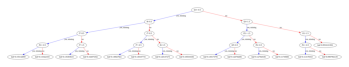

In [6]:
#XGBoost Visualizations
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=X_re,label=y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (200, 100)
plt.show()
#plt.savefig('filename.png', dpi=300)

In [10]:
# Gradient boosting in action...
'''
params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 10, 'learning_rate': 0.01}
model = ensemble.GradientBoostingClassifier(**params)

model.fit(x_train, y_train)
'''

GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                           min_samples_split=10, n_estimators=1000)

In [11]:
'''
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ',model_score)

y_predicted = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
#
'''

R2 sq:  0.6962519707610721
Mean squared error: 2.51
Test Variance score: 0.68


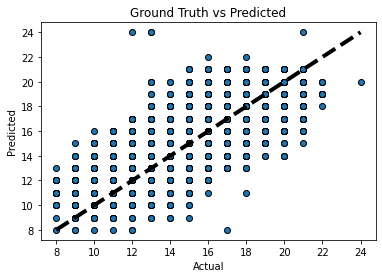

In [12]:
'''
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()
'''